In [211]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [212]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [213]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [214]:
sentiment_data=pd.read_csv('/sentiment_dataset (2) (1).csv',encoding='ISO-8859-1')

In [215]:
sentiment_data.shape

(30389, 6)

In [216]:
sentiment_data.head()

,val,id,timestamp,query,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [217]:
column_names=['target','id','date','flag','user','tweet']
sentiment_data=pd.read_csv('/sentiment_dataset (2) (1).csv',names=column_names,encoding='ISO-8859-1')


In [218]:
sentiment_data.shape

(30390, 6)

In [219]:
sentiment_data.head()

,target,id,date,flag,user,tweet
0,val,id,timestamp,query,username,tweet
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [220]:
sentiment_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
tweet     0
dtype: int64

In [221]:
sentiment_data['target'].value_counts()

target
0      30389
val        1
Name: count, dtype: int64

In [222]:
import pandas as pd
sentiment_data.loc[sentiment_data['tweet'].str.contains('good|great|awesome', case=False), 'sentiment'] = 'positive'
sentiment_data.loc[sentiment_data['tweet'].str.contains('bad|poor|terrible', case=False), 'sentiment'] = 'negative'
print(sentiment_data['sentiment'].value_counts())


sentiment
positive    1633
negative    1188
Name: count, dtype: int64


In [223]:
import pandas as pd
sentiment_data['target'] = sentiment_data['sentiment'].map({'positive': 1, 'negative': 0})
print(sentiment_data['target'].value_counts())


target
1.0    1633
0.0    1188
Name: count, dtype: int64


In [224]:
sentiment_data['target'].value_counts()

target
1.0    1633
0.0    1188
Name: count, dtype: int64

In [225]:
print(sentiment_data['sentiment'].unique())


[nan 'positive' 'negative']


In [226]:
print(sentiment_data[sentiment_data['target'].isnull()])


       target          id                          date      flag  \
0         NaN          id                     timestamp     query   
1         NaN  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
2         NaN  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
3         NaN  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
4         NaN  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...       ...         ...                           ...       ...   
30384     NaN  1563752320  Mon Apr 20 00:06:34 PDT 2009  NO_QUERY   
30385     NaN  1563752336  Mon Apr 20 00:06:35 PDT 2009  NO_QUERY   
30387     NaN  1563752697  Mon Apr 20 00:06:40 PDT 2009  NO_QUERY   
30388     NaN  1563752762  Mon Apr 20 00:06:41 PDT 2009  NO_QUERY   
30389     NaN  1563752958  Mon Apr 20 00:06:45 PDT 2009  NO_QUERY   

                  user                                              tweet  \
0             username                                              tweet   
1      _TheSpecia

In [227]:
import pandas as pd
sentiment_data.dropna(subset=['target'], inplace=True)
sentiment_data.reset_index(drop=True, inplace=True)
print(sentiment_data.isnull().sum())


target       0
id           0
date         0
flag         0
user         0
tweet        0
sentiment    0
dtype: int64


In [228]:

port_stem=PorterStemmer()

In [229]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [230]:
sentiment_data['stemmed_content']=sentiment_data['tweet'].apply(stemming)

In [231]:
print(sentiment_data['target'])

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2816    1.0
2817    1.0
2818    0.0
2819    1.0
2820    1.0
Name: target, Length: 2821, dtype: float64


In [232]:
x=sentiment_data['stemmed_content'].values
y=sentiment_data['target'].values

In [233]:
print(x)


['cocomix ill tell ya stori later good day ill workin like three hour'
 'nice day bad rain come tomorrow'
 'starrbbi bad around lost job even pay phone bill lmao aw shuck' ...
 'bnik never bad past week crappi poor sk lol laugh way loud mother f'
 'great start quot hatefulmonday quot feel like pack leav alway say leav ugli earli work busi work'
 'good morn twitter start anoth long week oh love monday morn']


In [234]:

print(y)

[1. 0. 0. ... 0. 1. 1.]


In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [236]:
print(x.shape,x_train.shape,x_test.shape)

(2821,) (2256,) (565,)


In [237]:
print(x_train)

['beanlavign good morn hope enjoy caffein kick mine awak watch idea'
 'lickmycupcak oh poor puppi what wrong' 'masterawesom pleas school' ...
 'love spring ohio snow accumul expect though suppos start warm tomorrow thank good'
 'miss hmmm good question tweet wish could go x'
 'mkr u thesis good finish part work week yay']


In [238]:
print(x_test)

['marielmendoza ive good dont even see campu miss'
 'faz yeah glad work look job offer good one' 'feel good' 'bad headach'
 'bed feel like crap stay watch ufc need sleep badli'
 'keeilaa ah watercolor miss bad'
 'realiz spend almost preciou weekend sleep wast bad sleep depriv well'
 'back home longgg day today parti time bad miss someon pretti darn special lt'
 'ahh crap penalti unit good atm' 'realli dont feel good right'
 'good news bad news warm relat havana good cigar tax though one'
 'greeneggznham yeah let go find new good guy oh wait realli exist ugh blown'
 'goodby disneyland go melros'
 'noth say good morn like voic mia oh work gonna much fun today'
 'noth put buy product badli dub foreign advert'
 'woke find snow scrape car degre miss fl disney famili bad'
 'dang neck hurt baddd want cri peac' 'awesomebrian much suck retir time'
 'axon got cancel everybodi els rattl brain amp makin cuss someth terribl'
 'purpl hoodi quit bad break drop mobil fair bit'
 'joelmadden omg movi is

In [239]:

vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [240]:
print(x_train)

  (0, 2205)	0.27118679189120304
  (0, 4922)	0.24978723111452433
  (0, 301)	0.3210334080252798
  (0, 2906)	0.3443523734465911
  (0, 2481)	0.3443523734465911
  (0, 670)	0.4023347250009639
  (0, 1400)	0.2925863526678818
  (0, 2134)	0.2194207711124938
  (0, 2988)	0.19516766075913788
  (0, 1851)	0.10284872170615592
  (0, 413)	0.4237342857776426
  (1, 5056)	0.4394431664708333
  (1, 4963)	0.4494404578313221
  (1, 3605)	0.46126474382610083
  (1, 3501)	0.2107445084680294
  (1, 3224)	0.2767609321263875
  (1, 2621)	0.5206898817997162
  (2, 3924)	0.4668397279694898
  (2, 3473)	0.5230200019878982
  (2, 2805)	0.7130993941309666
  (3, 894)	0.5043171632931454
  (3, 56)	0.5043171632931454
  (3, 2677)	0.3385454828702834
  (3, 2750)	0.28963357563071274
  (3, 1906)	0.196193639854506
  :	:
  (2253, 4913)	0.32593750359283186
  (2253, 4256)	0.289276587774219
  (2253, 4513)	0.25134974107819785
  (2253, 4557)	0.21059251351940433
  (2253, 4626)	0.22024529512278834
  (2253, 4295)	0.22591096502619037
  (2253, 270

In [241]:
print(x_test)

  (0, 3953)	0.3313451971701711
  (0, 2924)	0.2925865718739052
  (0, 2314)	0.4686338605398796
  (0, 1851)	0.13748629847515026
  (0, 1444)	0.3550841265596747
  (0, 1242)	0.38824401838170197
  (0, 685)	0.5378337345449881
  (1, 5095)	0.33384606676349754
  (1, 5033)	0.2455372121090528
  (1, 3248)	0.2787526346433007
  (1, 3217)	0.5244370123652331
  (1, 2681)	0.2859733117646319
  (1, 2377)	0.4261895626401439
  (1, 1851)	0.1272912722608051
  (1, 1817)	0.44260560726034676
  (2, 1851)	0.48914624160342096
  (2, 1544)	0.872201785325648
  (3, 2033)	0.9208873936246996
  (3, 338)	0.38982869091834105
  (4, 4922)	0.2824024181321658
  (4, 4779)	0.4548683242608132
  (4, 4300)	0.36737329855396145
  (4, 4109)	0.2686472769265517
  (4, 3095)	0.2660712319178313
  (4, 2628)	0.23940807141996645
  :	:
  (560, 837)	0.4847834911912562
  (560, 338)	0.15995743464322765
  (560, 236)	0.4099012354821876
  (561, 4626)	0.29628422628172807
  (561, 4608)	0.24324091861130223
  (561, 4598)	0.3487594016517146
  (561, 4589)	0.

In [242]:
model=LogisticRegression(max_iter=1000)

In [243]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [244]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [245]:
print('Accuracy score on the training data :',training_data_accuracy)

Accuracy score on the training data : 0.9929078014184397


In [246]:
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [247]:
print('Accuracy score on the test data :',test_data_accuracy)

Accuracy score on the test data : 0.9699115044247788


In [248]:
import pickle

In [249]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [250]:
loaded_model=pickle.load(open('/content/trained_model.sav','rb'))

In [251]:
x_new=x_test[200]
print(y_test[200])
prediction=model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

0.0
[0.]
The tweet is negative


In [252]:
x_new=x_test[3]
print(y_test[3])
prediction=loaded_model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')


0.0
[0.]
The tweet is negative


In [253]:
x_new=x_test[500]
print(y_test[500])
prediction=loaded_model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

1.0
[1.]
The tweet is positive


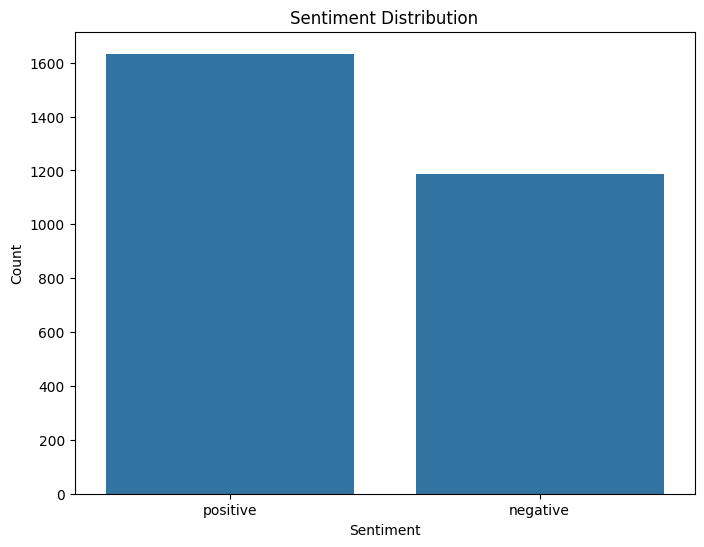

In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sentiment_counts = sentiment_data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=sentiment_data, order=sentiment_counts.index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(sentiment_data['sentiment'])
y = sentiment_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       238
         1.0       1.00      1.00      1.00       327

    accuracy                           1.00       565
   macro avg       1.00      1.00      1.00       565
weighted avg       1.00      1.00      1.00       565

